In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import os

##
from matplotlib.colors import LinearSegmentedColormap

#from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [ ]:
plt.style.use('default')
#plt.style.use('fivethirtyeight')
#plt.style.use('bmh')

In [ ]:
df = pd.read_csv("../data/clean/aggregate_df.csv")

df_customers = pd.read_csv("../data/clean/customers.csv")
df_orders = pd.read_csv("../data/clean/orders.csv")
df_items = pd.read_csv("../data/clean/order_items.csv")
df_products = pd.read_csv("../data/clean/products.csv")

In [ ]:
### reload

#df_orders = pd.read_csv("../data/clean/orders.csv")
#df = pd.read_csv("../data/clean/aggregate_df.csv")

In [ ]:
print("=== MAIN DF ===")
df.info()
print("\n=== CUSTOMERS ===")
df_customers.info()
print("\n=== ORDERS ===")
df_orders.info()
print("\n=== ORDER ITEMS ===")
df_items.info()
print("\n=== PRODUCTS ===")
df_products.info()

In [ ]:
df.head(10)

In [ ]:
# overview of the dataframe
    
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


In [ ]:
### ---  Column structuring --- 

id_list = ['Customers.id', 'Orders.id', 'Orders.customer_id', 'Orders.order_number', 'Orders.reorder_id',
           'Orders.coupon_id', 'Orders.reorder_id',
          'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id', 
          'Products.id',  'Products.import_id', 'Products.family_id'
        ]		


text_list = ['Customers.fname', 'Customers.lname', 'Customers.company', 
            'Orders.company', 'Orders.discount_name', 'Orders.shipping_method', 
            'Order_Items.product_name', 
            'Products.shopping_color'
            ]

integer_list = ['Customers.mailing', 'Order_Items.qty']


category_list = ['Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.discount_name',
                'Orders.payment_method', 'Orders.payment_status', 'Orders.status', 
                'Products.status', 'Products.vendor', 'Products.shopping_brand', 'Products.taxable'
                ]



In [ ]:
dfs = [df, df_orders, df_customers, df_items, df_products]

for data in dfs:
    for col in id_list:
        if col in data.columns:
            data[col] = data[col].astype("object")

    for col in category_list:
        if col in data.columns:
            data[col] = data[col].astype("category")

    for col in integer_list:
        if col in data.columns:
            data[col] = data[col].astype("int64")


In [ ]:
## ---  Check unique counts: FLAGs ---

df.nunique()[ (df.nunique() > 1) & (df.nunique() < 8) ]


In [ ]:
# check vendor unique values

df['Orders.status'].unique()


In [ ]:
### update order status values
  #повторно НЕ виконувати

# order_status_map = {
#     1:  "Completed",
#     0:  "Pending",
#     3:  "Shipped",
#     4:  "Cancelled",
#     5:  "Refunded",
#     8:  "Error",
#     12: "On Hold",
#     14: "Validation Required",
#     15: "Unknown"
# }

# df_orders['Orders.status'] = df_orders['Orders.status'].map(order_status_map)
# df['Orders.status'] = df['Orders.status'].map(order_status_map)
# # відсутні без мапи:
# df_orders['Orders.status'] = df_orders['Orders.status'].fillna("Unknown")
# df['Orders.status'] = df['Orders.status'].fillna("Unknown")

In [ ]:
df_orders['Orders.status'].value_counts(dropna=False)

In [ ]:
#df_orders['Orders.status'] = df_orders['Orders.status'].fillna("Unknown")

In [ ]:
#df_orders['Orders.payment_status'].value_counts(dropna=False) 
  #повторно НЕ виконувати

# payment_status_map = {
#     3.0: "Paid",
#     1.0: "Pending",
#     0.0: "Unpaid"
# }

# df_orders['Orders.payment_status'] = df_orders['Orders.payment_status'].map(payment_status_map).fillna("Unknown")
# df['Orders.payment_status'] = df['Orders.payment_status'].map(payment_status_map).fillna("Unknown")

In [ ]:
df_orders['Orders.payment_status'].value_counts(dropna=False)

In [ ]:
#df_products['Products.status'].value_counts(dropna=False)  #повторно НЕ виконувати

# product_status_map = {
#     0.0: "Active",
#     3.0: "Discontinued",
#     2.0: "Out of Stock",
#     1.0: "New",
#     5.0: "Archived"
# }

# #df_products['Products.status'] = (
# #    df_products['Products.status']
# #    .map(product_status_map)
# #    .fillna("Unknown")
# #)

# df['Products.status'] = (
#     df['Products.status']
#     .map(product_status_map)
#     .fillna("Unknown")
# )

In [ ]:
df['Products.status'].value_counts(dropna=False)

In [ ]:
# df['Products.taxable'] = df['Products.taxable'].fillna(2)
# mapping = {
#     1: "taxable",
#     0: "not taxable",
#     2: "unknown"
# }

# df['Products.taxable'] = df['Products.taxable'].map(mapping)
# #df_products['Products.taxable'] = df_products['Products.taxable'].map(mapping)

In [ ]:
df['Products.taxable'].value_counts(dropna=False)

In [ ]:
backup_df = df.copy()
backup_df_orders = df_orders.copy()
backup_df_customers = df_customers.copy()
backup_df_items = df_items.copy()
backup_df_products = df_products.copy()

In [ ]:
#df = backup_df
#df_orders = backup_df_orders
########################################################################################

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
corr = df.corr(numeric_only=True)

sns.heatmap(corr, 
            cmap="coolwarm",
            center=0,
            annot=False)

plt.show()

* * *

### **CUSTOMER**

In [ ]:
print("Customers: ", df_customers['Customers.id'].nunique())

business_customers = (df_customers['Customers.company'] != "Individual").sum()
print("Business Customers:", business_customers)

business_company = df_customers['Customers.company'].nunique() - 1 # ohne Individual
print("Business Company: ", business_company)

individual_customers = (df_customers['Customers.company'] == "Individual").sum()
print("Individual Customers:", individual_customers) 

In [ ]:
metrics = {
    "Total Customers": df_customers['Customers.id'].nunique(),
    "Business Customers": (df_customers['Customers.company'] != "Individual").sum(),
    "Business Companies": df_customers['Customers.company'].nunique() - 1,
    "Individual Customers": (df_customers['Customers.company'] == "Individual").sum()
}

df_metrics = pd.DataFrame(list(metrics.items()), columns=["Category", "Count"])

# Desired order
order = [
    "Total Customers",
    "Individual Customers",
    "Business Customers",
    "Business Companies"
]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_metrics,
    x="Category",
    y="Count",
    width=0.5,
    palette="Blues_d",
    order=order
)

# Add labels
for index, row in df_metrics.set_index("Category").loc[order].iterrows():
    plt.text(order.index(index), row["Count"] + 50, str(row["Count"]),
             ha='center', fontsize=11)

plt.ylim(0, 3400)
plt.title("Customer Overview")
plt.ylabel("Count")
plt.xlabel("")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
df['is_individual'] = df['Customers.company'] == "Individual"
df['is_business'] = df['Customers.company'] != "Individual"

individual_revenue = df[df['is_individual']]['Orders.total'].sum()
business_revenue = df[df['is_business']]['Orders.total'].sum()

print("Individual revenue:", individual_revenue, "USD")
print("Business revenue:", business_revenue, "USD")

# !ohne unique Order

In [ ]:
total_revenue = df['Orders.total'].sum()

print("Individual share:", round((individual_revenue / total_revenue * 100),2), "%")
print("Business share:", round((business_revenue / total_revenue * 100),2), "%")

In [ ]:
sizes = [individual_revenue, business_revenue]
labels = ["Individual", "Business"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=["#66c2a5", "#3288bd"], wedgeprops={'width':0.4})

plt.title("Share of Revenue by Customer Type")
plt.show()

In [ ]:
# ---- COLORS ----
colors = {
    "Individual": "#66c2a5",
    "Business": "#3288bd"
}

# ==================CUSTOMER DATA========================
customers_unique = df.drop_duplicates(subset='Customers.id').copy()


customers_unique['customer_type'] = customers_unique['Customers.company'].map(
    lambda x: "Business" if x != "Individual" else "Individual"
)

customer_counts = (
    customers_unique.groupby('customer_type')['Customers.id']
    .count()
    .reset_index(name='customer_count')
    .sort_values('customer_type')
)

customer_colors = [colors[x] for x in customer_counts['customer_type']]

# ===================ORDER DATA=======================
orders_unique = df.drop_duplicates(subset='Orders.id').copy()

orders_unique['customer_type'] = orders_unique['is_business'].map({
    True: 'Business',
    False: 'Individual'
})

# ---- Mean order value ----
mean_values = (
    orders_unique.groupby('customer_type')['Orders.total']
    .mean()
    .reset_index()
    .sort_values('customer_type')
)

mean_colors = [colors[x] for x in mean_values['customer_type']]

# ---- Order count ----
order_counts = (
    orders_unique.groupby('customer_type')['Orders.id']
    .count()
    .reset_index(name='order_count')
    .sort_values('customer_type')
)

count_colors = [colors[x] for x in order_counts['customer_type']]

# ---- TOTAL SPENT (sum of Orders.total) ----
total_spent = (
    orders_unique.groupby('customer_type')['Orders.total']
    .sum()
    .reset_index(name='total_spent')
    .sort_values('customer_type')
)

total_colors = [colors[x] for x in total_spent['customer_type']]


# ===================PLOT=======================
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# === (1) CUSTOMER COUNT ===
sns.barplot(
    data=customer_counts,
    x='customer_type', y='customer_count',
    palette=customer_colors, width=0.5,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Anzahl der Kunden")
axes[0, 0].set_xlabel("Kundentyp")
axes[0, 0].set_ylabel("Kundenanzahl")
axes[0, 0].tick_params(axis='x', labelsize=12)

# === (2) ORDER COUNT ===
sns.barplot(
    data=order_counts,
    x='customer_type', y='order_count',
    palette=count_colors, width=0.5,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Anzahl der Bestellungen")
axes[0, 1].set_xlabel("Kundentyp")
axes[0, 1].set_ylabel("Bestellungen")
axes[0, 1].tick_params(axis='x', labelsize=12)

# === (3) MEAN ORDER VALUE ===
sns.barplot(
    data=mean_values,
    x='customer_type', y='Orders.total',
    palette=mean_colors, width=0.5,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Durchschnittlicher Bestellwert")
axes[1, 0].set_xlabel("Kundentyp")
axes[1, 0].set_ylabel("Bestellwert")
axes[1, 0].tick_params(axis='x', labelsize=12)


# === (4) TOTAL SPENT ===
sns.barplot(
    data=total_spent,
    x='customer_type', y='total_spent',
    palette=total_colors, width=0.5,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Summe der Ausgaben (Revenue)")
axes[1, 1].set_xlabel("Kundentyp")
axes[1, 1].set_ylabel("Gesamtausgaben")
axes[1, 1].tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()

# ===================TABLE=======================
print(customer_counts, "\n")
print(mean_values, "\n")
print(order_counts, "\n")
print(total_spent)

* * *

### **ORDER**

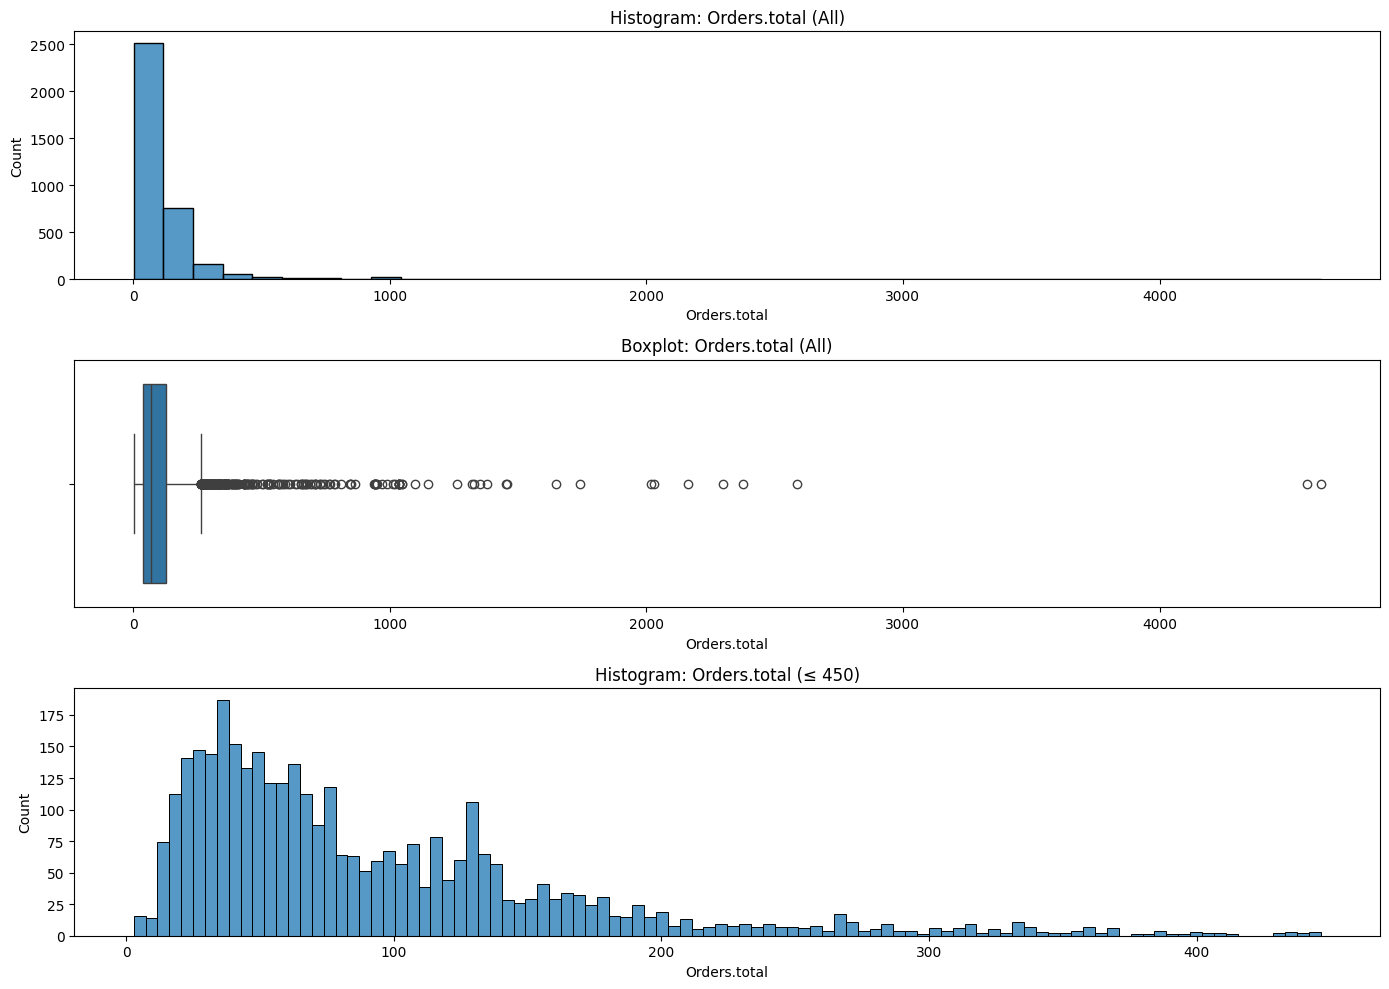

In [101]:
plt.figure(figsize=(14, 10))

# =================== 1. Histogram: all Orders.total 
plt.subplot(3, 1, 1)
sns.histplot(df_orders['Orders.total'], bins=40)
plt.title('Histogram: Orders.total (All)')

# =================== 2. Boxplot: all Orders.total 
plt.subplot(3, 1, 2)
sns.boxplot(x=df_orders['Orders.total'])
plt.title('Boxplot: Orders.total (All)')

# =================== 3. Histogram: Orders.total <= 450 
plt.subplot(3, 1, 3)
sns.histplot(df_orders[df_orders['Orders.total'] <= 450]['Orders.total'], bins=100)
plt.title('Histogram: Orders.total (≤ 450)')

plt.tight_layout()
plt.show()

In [102]:
print("----------------------------------------------------\n")
print("   Kreuztabelle: Bestellstatus nach Zahlungsstatus  \n")
print("----------------------------------------------------\n")

ct_status = pd.crosstab(df_orders["Orders.status"], df_orders["Orders.payment_status"])
ct_status

----------------------------------------------------

   Kreuztabelle: Bestellstatus nach Zahlungsstatus  

----------------------------------------------------



Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.status,,,,
Cancelled,13,11,0,0
Completed,3295,0,4,18
Error,1,0,0,0
On Hold,12,0,0,0
Pending,7,15,0,0
Refunded,101,9,1,0
Shipped,53,2,0,2
Unknown,3,1,0,0
Validation Required,17,0,0,0


In [103]:
print("----------------------------------------------------\n")
print("            Zahlungsart nach Zahlungsstatus  \n")
print("----------------------------------------------------\n")
ct_pay_method = pd.crosstab(df_orders["Orders.payment_method"], df_orders["Orders.payment_status"])
ct_pay_method

----------------------------------------------------

            Zahlungsart nach Zahlungsstatus  

----------------------------------------------------



Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.payment_method,,,,
Cash,2,0,0,0
Check,24,0,0,0
Credit Card,360,0,5,6
PayPal,281,0,0,0
authorize.net,2835,38,0,0


In [104]:
df_orders["has_reorder"] = df_orders["Orders.reorder_id"].notna().astype(int)
df_orders["has_tax"] = (df_orders["Orders.tax"] > 0).astype(int)
df_orders["has_shipping"] = (df_orders["Orders.shipping"] > 0).astype(int)
df_orders["has_coupon"] = df_orders["Orders.coupon_id"].notna().astype(int)

# discount_name є завжди, але треба перевірити, чи там "No Discount", "" або NaN
df_orders["has_discount"] = df_orders["Orders.discount_name"].ne("No Discount").astype(int)

In [105]:
print("----------------------------------------------------\n")
print("  Kreuztabelle: Orders.status -- Feature-Indikatoren  \n")
print("----------------------------------------------------\n")

ct_features = df_orders.groupby("Orders.status", observed=True)[[
    "has_reorder",
    "has_tax",
    "has_shipping",
    "has_coupon",
    "has_discount"
]].sum()

ct_features

----------------------------------------------------

  Kreuztabelle: Orders.status -- Feature-Indikatoren  

----------------------------------------------------



,has_reorder,has_tax,has_shipping,has_coupon,has_discount
Orders.status,,,,,
Cancelled,1,1,17,3,0
Completed,61,235,2322,598,334
Error,0,0,0,0,0
On Hold,0,1,7,2,3
Pending,0,2,9,3,1
Refunded,0,7,67,22,2
Shipped,1,12,41,5,3
Unknown,0,0,3,0,0
Validation Required,0,3,10,7,0


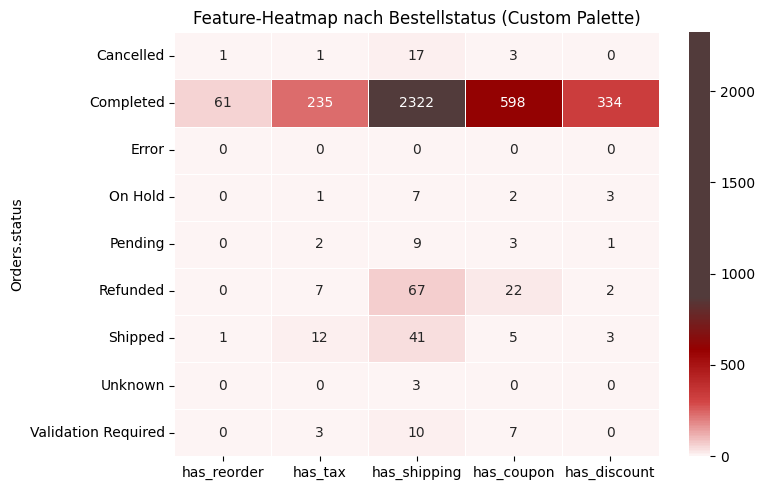

In [106]:
# # ---------- 1. Бінарні колонки ----------
# df_orders["has_reorder"] = df_orders["Orders.reorder_id"].notna().astype(int)
# df_orders["has_tax"] = (df_orders["Orders.tax"] > 0).astype(int)
# df_orders["has_coupon"] = df_orders["Orders.coupon_id"].notna().astype(int)
# df_orders["has_discount"] = df_orders["Orders.discount_name"].ne("No Discount").astype(int)

# # ---------- 2. Крос-таблиця ----------
# ct_features = df_orders.groupby("Orders.status")[[
#     "has_reorder",
#     "has_tax",
#     "has_shipping",
#     "has_coupon",
#     "has_discount"
# ]].sum()


# ---------- 3. Heatmap ----------
from matplotlib.colors import LinearSegmentedColormap

colors = [
    "#fdf4f4",  # 0%
    "#D34646",  # 10%
    "#970000",  # 25%
    "#523B3B",  
    "#523B3B",  # 50%
    "#523B3B", 
    "#523B3B",  # 75%
    "#523B3B",   
    "#523B3B",  # 100%         
]

custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)

plt.figure(figsize=(8, 5))
sns.heatmap(
    ct_features,
    annot=True,
    fmt="d",
    cmap=custom_cmap,
    linewidths=0.5,
    linecolor="white"
)

plt.title("Feature-Heatmap nach Bestellstatus (Custom Palette)")
plt.ylabel("Orders.status")
plt.tight_layout()
plt.show()

In [ ]:
###   -- ПРИКЛАД зі стандартною кольоровою мапою
# sns.heatmap(
#     ct_features,
#     annot=True,
#     fmt="d",
#     cmap="Reds"
# )
# plt.tight_layout()


In [109]:
df['Orders.shipping'].value_counts(dropna=False).head(10)

Orders.shipping
9.95     2758
0.00     1110
NaN       195
6.71       16
6.45       15
5.05       14
19.41       8
6.73        7
6.52        7
6.68        4
Name: count, dtype: int64

In [110]:
df_clean = df_orders.dropna(subset=[
    "Orders.shipping_carrier",
    "Orders.shipping_method"
])

df_clean["shipping_paid"] = (df_clean["Orders.shipping"] > 0).astype(int)

C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\3670468802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["shipping_paid"] = (df_clean["Orders.shipping"] > 0).astype(int)


In [92]:
ct_carrier = pd.crosstab(
    df_clean["shipping_paid"],
    df_clean["Orders.shipping_carrier"]
)
ct_carrier.T

shipping_paid,0,1
Orders.shipping_carrier,,
FEDX,0,1
HWEP,0,1
INTF,0,1
MT03,0,1
NDSN,1,0
NSVA,1,0
RDWY,0,1
WTVA,1,1
fedex,375,1628


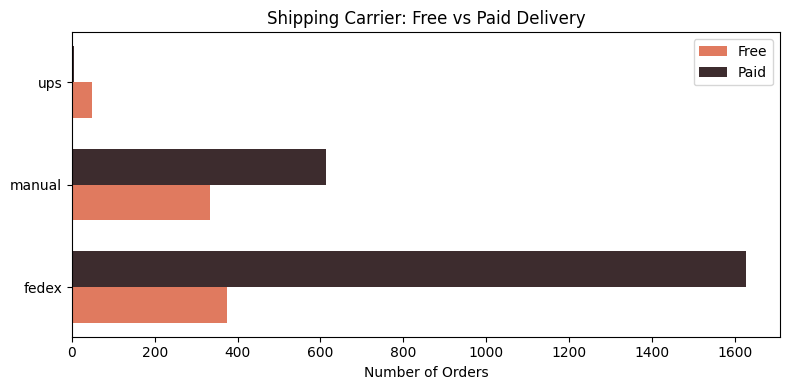

In [93]:
# Select only standard methods
main_methods = ["fedex", "manual", "ups"]
ct_main = ct.loc[main_methods]

#  free or paid
free = ct_main[0].values
paid = ct_main[1].values
methods = ct_main.index.tolist()

# plot
x = np.arange(len(methods))
height = 0.35

plt.figure(figsize=(8, 4))
plt.barh(x - height/2, free, height, label="Free", color="#E07A5F")
plt.barh(x + height/2, paid, height, label="Paid", color="#3D2C2E")

plt.yticks(x, methods)
plt.xlabel("Number of Orders")
plt.title("Shipping Carrier: Free vs Paid Delivery")
plt.legend()

plt.tight_layout()
plt.show()

In [94]:
ct_method = pd.crosstab(
    df_clean["shipping_paid"],
    df_clean["Orders.shipping_method"]
)
ct_method.T

shipping_paid,0,1
Orders.shipping_method,,
FEDERAL EXPRESS CORP.,0,1
Free Shipping,300,6
Ground,375,1628
"HOWARD'S EXPRESS, INC.",0,1
INTERNATIONAL FEDEX,0,1
MEDTRANS,0,1
NATIONAL DELIVERY,1,0
NATIONAL DELIVERY SYSTEMS,1,0
ROADWAY EXPRESS,0,1


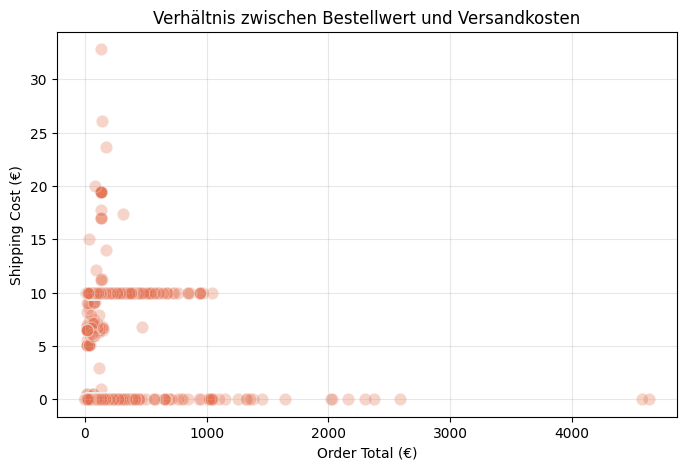

In [119]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df_orders,
    x="Orders.total",
    y="Orders.shipping",
    color="#E47152",
    s=80,        # більші точки
    alpha=0.3    # більше прозорості
)

plt.xlabel("Order Total (€)")
plt.ylabel("Shipping Cost (€)")
plt.title("Verhältnis zwischen Bestellwert und Versandkosten")
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\365534233.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\365534233.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


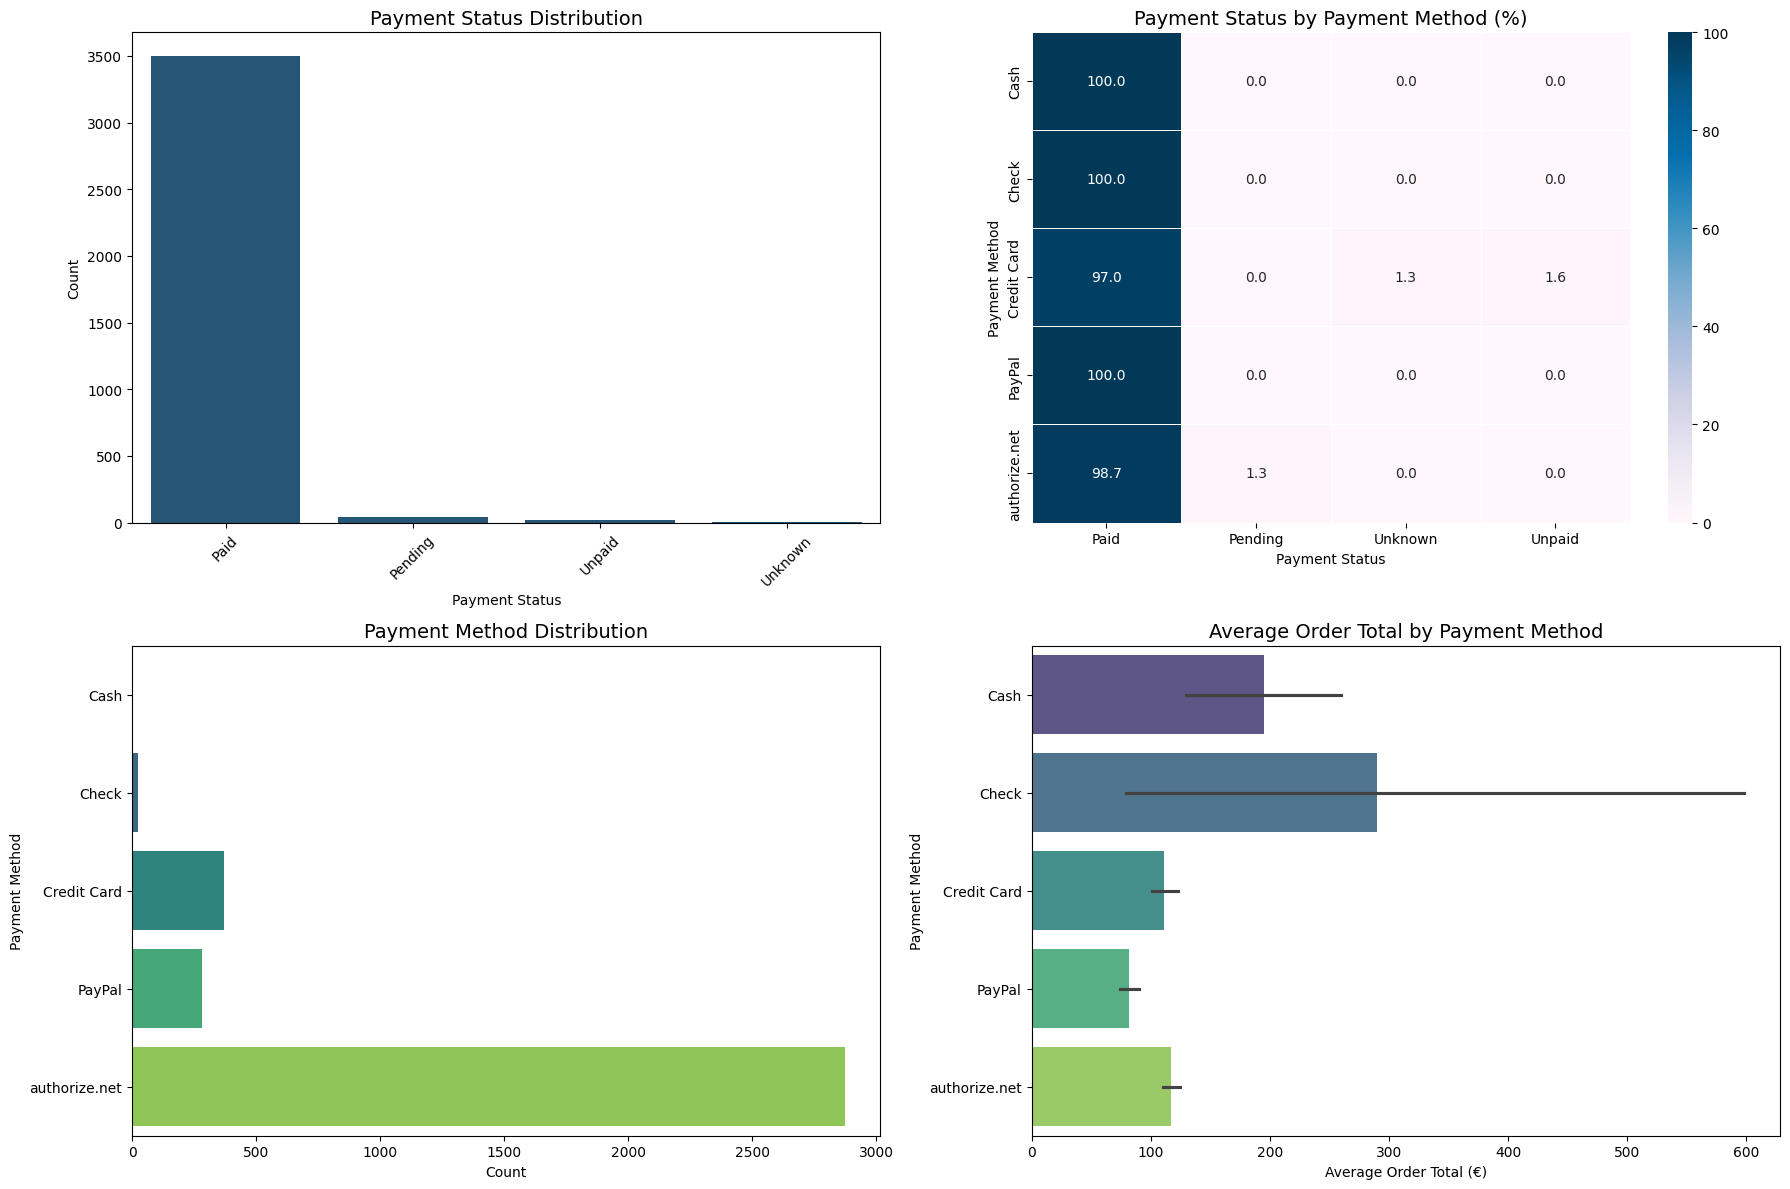

In [198]:
# --- Єдиний порядок payment_method для графіків 3 і 4 ---
method_order = sorted(df_orders['Orders.payment_method'].dropna().unique())


fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# === 1. Payment Status Distribution ===
sns.countplot(
    data=df_orders,
    x='Orders.payment_status',
    order=df_orders['Orders.payment_status'].value_counts().index,
    ax=axes[0, 0],
    color="#1A5782"
 
)
axes[0, 0].set_title('Payment Status Distribution', fontsize=14)
axes[0, 0].set_xlabel('Payment Status')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)


# === 2. Heatmap (Payment Status by Payment Method) ===
ct = pd.crosstab(
    df_orders['Orders.payment_method'],
    df_orders['Orders.payment_status'],
    normalize='index'
) * 100

sns.heatmap(
    ct,
    annot=True,
    fmt=".1f",
    cmap='PuBu',
    linewidths=.5,
    ax=axes[0, 1]
)

axes[0, 1].set_title('Payment Status by Payment Method (%)', fontsize=14)
axes[0, 1].set_xlabel('Payment Status')
axes[0, 1].set_ylabel('Payment Method')


# === 3. Payment Method Distribution (HORIZONTAL, sorted!) ===
sns.countplot(
    data=df_orders,
    y='Orders.payment_method',     # ← категорії тепер по осі Y
    order=method_order,
    ax=axes[1, 0],
    palette="viridis",
)
axes[1, 0].set_title('Payment Method Distribution', fontsize=14)
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Payment Method')
axes[1, 0].tick_params(axis='y', rotation=0)


# === 4. Average Order Total by Payment Method (HORIZONTAL) ===
sns.barplot(
    data=df_orders,
    y='Orders.payment_method',     # ← теж по Y
    x='Orders.total',
    estimator='mean',
    order=method_order,
    ax=axes[1, 1],
    palette="viridis",
    alpha=0.9
)
axes[1, 1].set_title('Average Order Total by Payment Method', fontsize=14)
axes[1, 1].set_xlabel('Average Order Total (€)')
axes[1, 1].set_ylabel('Payment Method')
axes[1, 1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


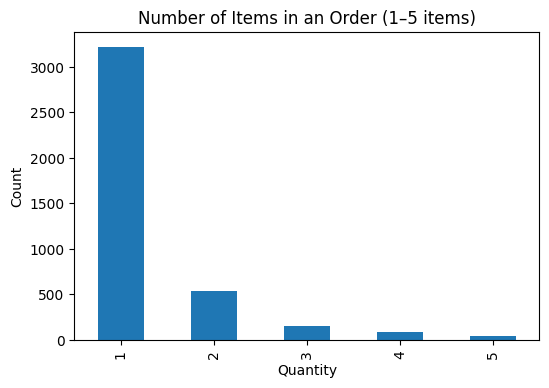

In [ ]:
small_qty = df[df['Order_Items.qty'] <= 5]

plt.figure(figsize=(6, 4))

small_qty['Order_Items.qty'] \
    .value_counts() \
    .sort_index() \
    .plot(kind='bar')

plt.title('Number of Items in an Order (1-5 items)')
plt.xlabel('Quantity')
plt.ylabel('Count')

plt.show()

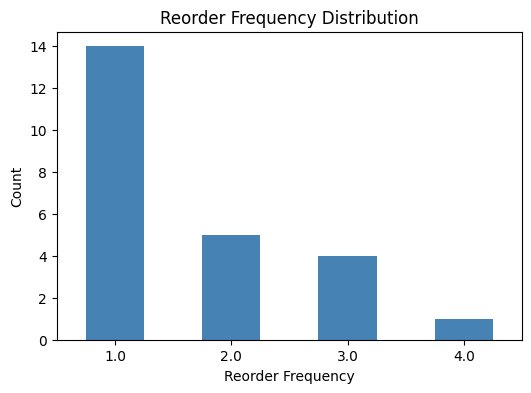

In [205]:
plt.figure(figsize=(6, 4))

(df_items[df_items['Order_Items.reorder_frequency'].notna()]['Order_Items.reorder_frequency']
    .value_counts()
    .sort_index()
    .plot(kind='bar', color='steelblue'))

plt.title('Reorder Frequency Distribution')
plt.xlabel('Reorder Frequency')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

<Axes: xlabel='Order_Items.price', ylabel='Count'>

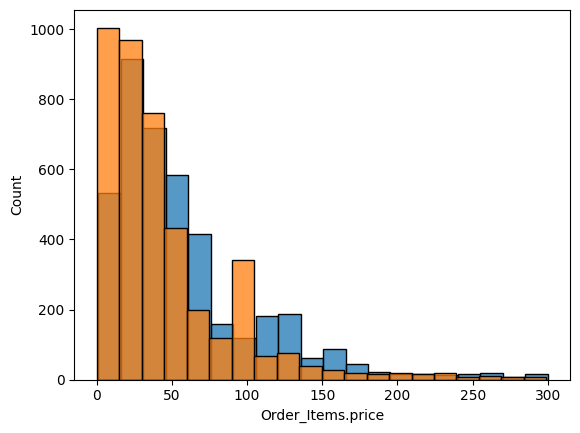

In [152]:
sns.histplot(df_items[df_items["Order_Items.price"] <= 300], x="Order_Items.price", bins=20)
sns.histplot(df_items[df_items["Order_Items.cost"] <= 300], x="Order_Items.cost", bins=20)


<Axes: xlabel='Order_Items.qty', ylabel='line_revenue'>

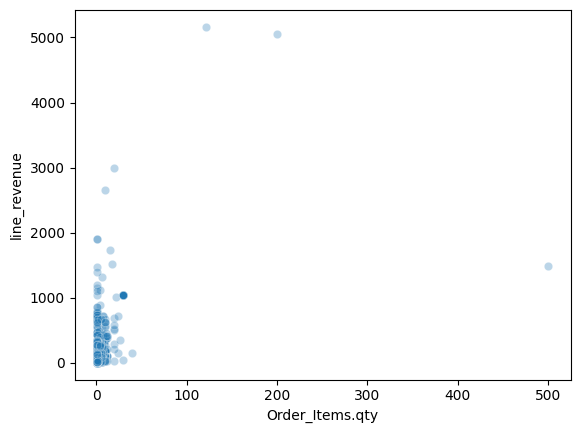

In [153]:
df_items["line_revenue"] = df_items["Order_Items.qty"] * df_items["Order_Items.price"]

sns.scatterplot(
    data=df_items,
    x="Order_Items.qty",
    y="line_revenue",
    alpha=0.3
)

<Axes: xlabel='count', ylabel='avg_price'>

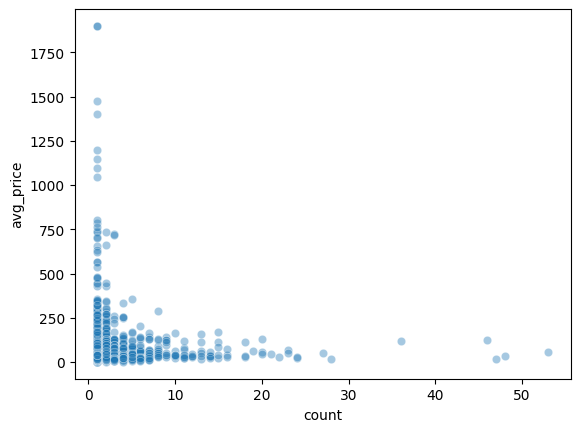

In [154]:
group_product_name = df_items.groupby("Order_Items.product_name").agg(
    count=("Order_Items.id", "count"),
    avg_price=("Order_Items.price", "mean")
)

sns.scatterplot(data=group_product_name, x="count", y="avg_price", alpha=0.4)


In [157]:
### --- outliers investigation ---
#df_orders[df_orders['Orders.total'] > 1500].sort_values(by='Orders.total', ascending=False)

df_orders[df_orders['Orders.total'] > 1500] \
    .sort_values(by='Orders.total', ascending=False) \
    [['Orders.id', 'Orders.customer_id', 'Orders.total', 'Orders.payment_amount' ]]

,Orders.id,Orders.customer_id,Orders.total,Orders.payment_amount
473,2144,442,4627.95,4627.95
2936,14924,3006,4575.00,4575.00
3129,15657,3234,2588.00,2588.00
2035,10729,2022,2375.59,2375.59
128,572,143,2300.00,2300.00
3083,15457,3174,2164.30,2164.30
1931,9742,1918,2031.93,2031.93
2510,12835,2539,2017.92,NaN
2511,12836,2540,1740.00,580.00
203,965,218,1647.06,1548.06


In [164]:
orders_per_customer = df_orders['Orders.customer_id'].value_counts()
orders_per_customer

Orders.customer_id
851     18
515     15
1371    15
403     15
1043    14
        ..
59       1
60       1
61       1
62       1
3698     1
Name: count, Length: 3054, dtype: int64

In [165]:
aov_per_customer = df_orders.groupby('Orders.customer_id')['Orders.total'].mean()
aov_per_customer

Orders.customer_id
3        54.360000
4        29.550000
5        41.663333
7        49.140000
8        69.700000
           ...    
3730     16.060000
3732     39.990000
3733    989.100000
3735    129.990000
3736     24.540000
Name: Orders.total, Length: 3054, dtype: float64

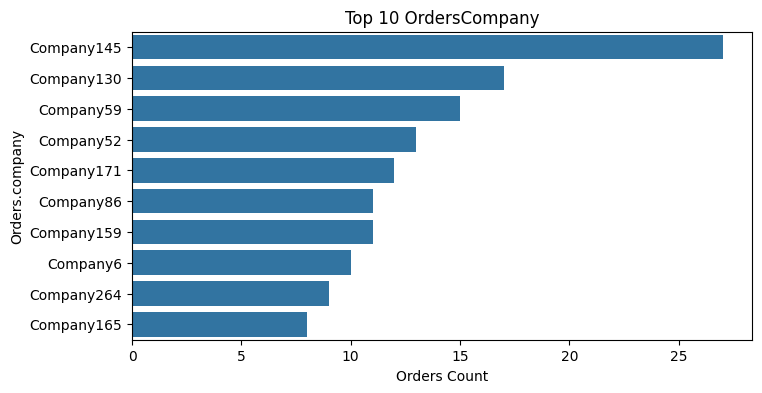

In [209]:
top_company = df['Orders.company'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_company.values, y=top_company.index)
plt.title("Top 10 OrdersCompany")
plt.xlabel("Orders Count")
plt.show()

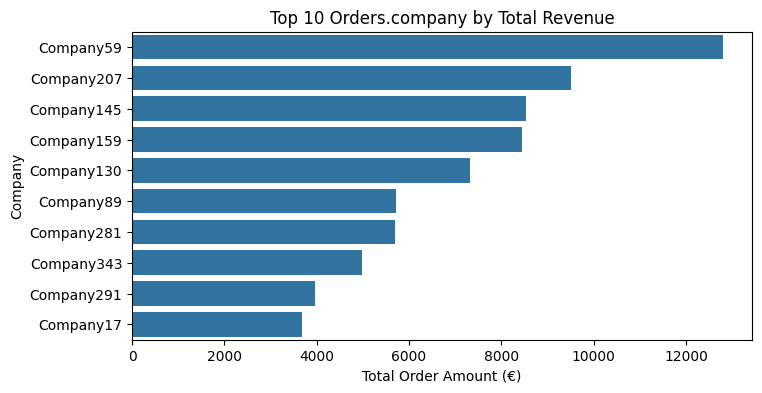

In [210]:
top_company_total = (
    df.groupby('Orders.company')['Orders.total']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(8,4))
sns.barplot(
    x=top_company_total.values,
    y=top_company_total.index,
    orient='h'
)
plt.title("Top 10 Orders.company by Total Revenue")
plt.xlabel("Total Order Amount (€)")
plt.ylabel("Company")
plt.show()

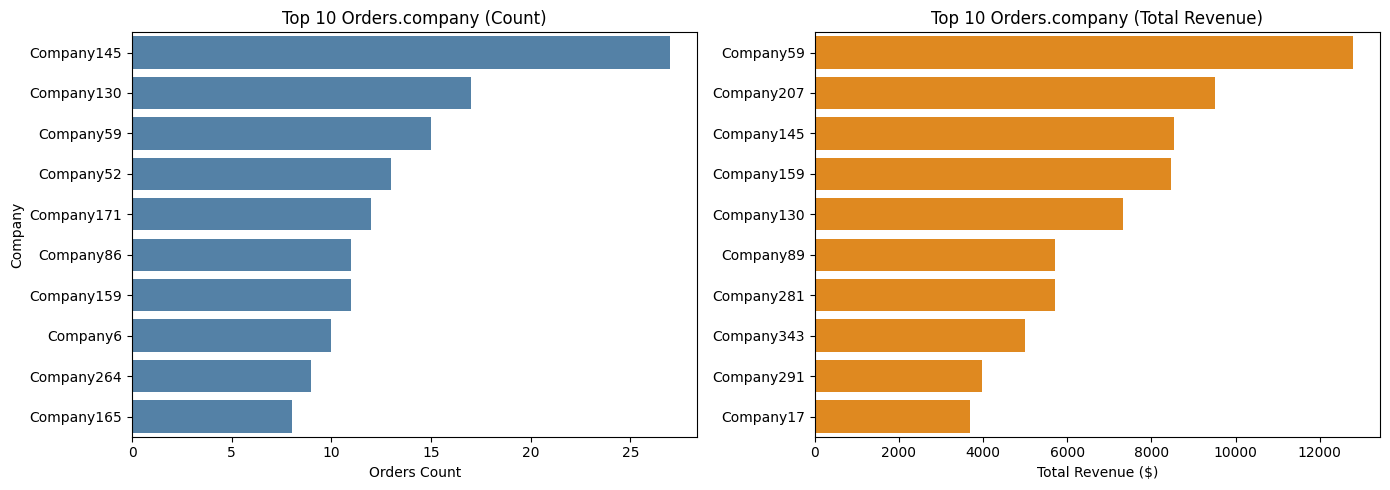

In [212]:
# --- 1. Top-10 компаній за кількістю ---
top_company_count = df['Orders.company'].value_counts().head(10)

# --- 2. Top-10 компаній за сумою замовлень ---
top_company_total = (
    df.groupby('Orders.company')['Orders.total']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(14, 5))

# === LEFT subplot — COUNT ===
plt.subplot(1, 2, 1)
sns.barplot(x=top_company_count.values, y=top_company_count.index, color="steelblue")
plt.title("Top 10 Orders.company (Count)")
plt.xlabel("Orders Count")
plt.ylabel("Company")

# === RIGHT subplot — TOTAL REVENUE ===
plt.subplot(1, 2, 2)
sns.barplot(x=top_company_total.values, y=top_company_total.index, color="darkorange")
plt.title("Top 10 Orders.company (Total Revenue)")
plt.xlabel("Total Revenue ($)")
plt.ylabel("")

plt.tight_layout()
plt.show()

In [213]:
df['Products.taxable'].isna().sum()

np.int64(0)

In [208]:
df_products['Products.taxable'].unique()
#df_products[df_products['Products.taxable'].isna()]
#df_products[df_products['Products.taxable'].isna()][['Products.id', 'Products.name', 'Products.taxable']]



['Taxable', 'Unknown', 'Not taxable']
Categories (3, object): ['Not taxable', 'Taxable', 'Unknown']

In [ ]:
small_qty = df[df['Order_Items.qty'] <= 5]

plt.figure(figsize=(6, 4))

sns.histplot(data=small_qty, x='Order_Items.qty', bins=5)

plt.title('Number of Items in an Order (1-5 items)')

plt.show()